# algorithm

This notebook describes the algorithm.

In [1]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
import numpy as np

In [3]:
import pandas as pd
import sqlalchemy
import connect_aws_db as cadb

In [4]:
engine = cadb.connect_aws_db(write_unicode=True)

In [5]:
conn = engine.connect()

In [6]:
cmd = 'SELECT * FROM yelp_reviews'

In [7]:
yelp_reviews = pd.read_sql(cmd, engine)

In [8]:
yelp_reviews.head(3)

,rev_id,business_id,yelp_review_date,yelp_review_id,review_rating,review_text,user_id
0,1,bWWrrsPWuoHuAGUCgH8Tyg,2007-10-28,TMiAAS5RB-P5EwXs7B9aBw,4,I stayed at the hotel for several months durin...,ZqoMKTrJOtyYZOcvP8rTUA
1,2,bWWrrsPWuoHuAGUCgH8Tyg,2008-01-05,F78V6FFuUr9pawcok4YRyg,5,I have been coming to Pittsburgh for quite a w...,uiMTavYKLw9hxskV4xB2tg
2,3,bWWrrsPWuoHuAGUCgH8Tyg,2008-03-08,g6vMKao00XSECOd6JtKPEA,4,This is a very good hotel and with a corporate...,TckShYnQa0eD3WQxdoE3GQ


In [9]:
cmd = 'SELECT * FROM bf_reviews'

In [10]:
bf_reviews = pd.read_sql(cmd, engine)

In [11]:
bf_reviews

,review_id,hotel_id,business_id,user_id,username,review_title,review_rating,review_text
0,1,0,None,0,"\nMarti Ackermann\nin Tucson, AZ\n",Pointe Hilton Squaw Peak,5,Really nice property. Great walking areas for ...
1,2,1,None,0,\nJen\nin Vancouver\n,Great place to stay!,5,We've stayed at this La Quinta several times w...
2,3,1,None,0,"\nJody\nin Sierra Vista, AZ\n",Awesome Staff!!,5,This place was awesome!! The entire staff was ...
3,4,1,None,0,\nKristi\nin Henderson NV\n,Very dog friendly,5,We've stayed at this hotel two times with our ...
4,5,1,None,0,\nChristopher\nin Los Angeles\n,All around great place to stay.,4,My room while a bit small was very clean and t...
5,6,1,None,0,\nDave\nin Sedona\n,Management and customer service,3,The big gentleman who manages the front desk i...
6,7,1,None,0,\nTeri\nin Southern California\n,Bad Experience.,1,"I was driving from So Cal to Houston, TX for t..."
7,8,2,None,0,\nemma\nin park city\n,no dog area,2,the hotel was fine but it is all hard scape ar...


In [12]:
cmd = 'SELECT * FROM bf_hotels'

In [13]:
bf_hotels = pd.read_sql(cmd, engine)

In [14]:
bf_hotels

,hotel_id,hotel_url,hotel_name,hotel_address,hotel_city,hotel_state,hotel_rating,hotel_latitude,hotel_longitude,business_id,review_count
0,1,http://www.bringfido.com/lodging/city/phoenix_...,Pointe Hilton Squaw Peak Resort,\n7677 North 16th Street,Phoenix,AZ,5,0,0,N1xMSUfv1GmfHGa9a3VuJw,1
1,2,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
2,3,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
3,4,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
4,5,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
5,6,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
6,7,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
7,8,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix North,\n2510 WGreenway Rd,Phoenix,AZ,2,0,0,None,1


In [15]:
cmd = 'SELECT * FROM yelp_hotels'

In [16]:
yelp_hotels = pd.read_sql(cmd, engine)

In [17]:
yelp_hotels[yelp_hotels['hotel_name'].str.contains('Squaw')]

,hotel_id,hotel_name,hotel_rating,hotel_city,hotel_state,hotel_latitude,hotel_longitude,review_count,hotel_address,business_id,dogs_allowed
61,62,Pointe Hilton Squaw Peak Resort,3.5,Phoenix,AZ,33.5478,-112.047,160,"7677 N 16th St\nPhoenix, AZ 85020",N1xMSUfv1GmfHGa9a3VuJw,1


In [18]:
bf_hotels['business_id'][0] = 'N1xMSUfv1GmfHGa9a3VuJw'

In [19]:
bf_hotels

,hotel_id,hotel_url,hotel_name,hotel_address,hotel_city,hotel_state,hotel_rating,hotel_latitude,hotel_longitude,business_id,review_count
0,1,http://www.bringfido.com/lodging/city/phoenix_...,Pointe Hilton Squaw Peak Resort,\n7677 North 16th Street,Phoenix,AZ,5,0,0,N1xMSUfv1GmfHGa9a3VuJw,1
1,2,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
2,3,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
3,4,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
4,5,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
5,6,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
6,7,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix Arcadia,\n4727 E Thomas Rd,Phoenix,AZ,4,0,0,None,6
7,8,http://www.bringfido.com/lodging/city/phoenix_...,La Quinta Inn Phoenix North,\n2510 WGreenway Rd,Phoenix,AZ,2,0,0,None,1


In [44]:
cmd = "DROP TABLE bf_hotels"
result = conn.execute(cmd)

In [45]:
cmd = """
        CREATE TABLE bf_hotels
        (
        hotel_id MEDIUMINT AUTO_INCREMENT,
        hotel_url VARCHAR(512),
        hotel_name VARCHAR(512),
        hotel_address VARCHAR(1024),
        hotel_city VARCHAR(512),
        hotel_state VARCHAR(32),
        hotel_rating INT,
        hotel_latitude FLOAT,
        hotel_longitude FLOAT,
        business_id VARCHAR(256),
        review_count MEDIUMINT,
        PRIMARY KEY (hotel_id)
        )
        """
        

In [46]:
result = conn.execute(cmd)

In [47]:
bf_hotels.to_sql('bf_hotels', engine, if_exists='append', index=False)

In [20]:
yelp = pd.merge(yelp_hotels, yelp_reviews, on='business_id', how='inner')

In [21]:
yelp

,hotel_id,hotel_name,hotel_rating,hotel_city,hotel_state,hotel_latitude,hotel_longitude,review_count,hotel_address,business_id,dogs_allowed,rev_id,yelp_review_date,yelp_review_id,review_rating,review_text,user_id
0,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,1,2007-10-28,TMiAAS5RB-P5EwXs7B9aBw,4,I stayed at the hotel for several months durin...,ZqoMKTrJOtyYZOcvP8rTUA
1,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,2,2008-01-05,F78V6FFuUr9pawcok4YRyg,5,I have been coming to Pittsburgh for quite a w...,uiMTavYKLw9hxskV4xB2tg
2,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,3,2008-03-08,g6vMKao00XSECOd6JtKPEA,4,This is a very good hotel and with a corporate...,TckShYnQa0eD3WQxdoE3GQ
3,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,4,2008-03-29,PNS9z4aFDbfhpIsHCfNvNg,4,"i got upgraded to a junior suite, and then aga...",MquuHY8ar78FUjkbcmVyPw
4,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,5,2008-07-07,gyYXmBwP3jSinLuXtuGRuQ,5,This is a fantastic hotel. I went to a conven...,pzhiDEp8EFltFmdldP9Oow
5,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,6,2008-11-22,fmL0UvXQgPwN6mO3HEs1jA,3,"Being a Southern California boy, I was not par...",EV4u-Ct9a0Yl7ecwAffccw
6,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,7,2009-04-06,UcdYzG9E_xDqgIWhZEjz5Q,4,I was in town for an interview and didn't pay ...,5SLDX3bXcRP52QlStIcYLg
7,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,8,2009-07-20,KE9THkNNQ0p9K5KGLSc_9Q,4,The Westin is a great place to stay. The beds...,sOnj2ToEH_q-pajhmHsI4w
8,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,9,2009-11-27,aha23u_Yxh1d8C8ZHfDqTA,4,I really enjoyed my stay at the Westin. Durin...,YqhqFM2Q400HXFy0L6QL2g
9,1,"The Westin Convention Center, Pittsburgh",3.5,Pittsburgh,PA,40.4442,-79.9949,70,"1000 Penn Ave\nDowntown\nPittsburgh, PA 15222",bWWrrsPWuoHuAGUCgH8Tyg,1,10,2010-02-05,qZZRuL_W7M65BWchFXED7Q,2,"When I think of Westins, I think of business-c...",q_jNEFRQfYunkJlqEITSHw


In [22]:
len(yelp)

6263

In [23]:
yelp_phoenix = yelp[yelp['hotel_city'] == 'Phoenix']

In [24]:
len(yelp_phoenix)

1120

In [25]:
yelp_dog_review = yelp_phoenix[yelp_phoenix['review_text'].str.contains('dog')].copy()

In [101]:
ydrri = yelp_dog_review.reset_index()

In [102]:
ydrri.loc[0, 'review_text']

u"Seven day stay between Christmas and New Year.   I cannot believe this is an Embassy Suite, it did not impress me one bit.  Dirty beyond belief.   I found dirt on the ceiling, dirt on the floor and DIRT IN THE SILVERWARE DISPENSER CONTAINERS @ BREAKFAST AREA.  \nI was with a group and the arrangements were made by someone else, but I certainly would not have stayed for seven nights if my wife had not insisted I shut up about it.  Management will be hearing from me and hopefully no one gets sick eating here cause this place does not pass the basic cleanliness test for any health department.  \n\n I have stayed in some of the creepiest hotels in America cause I am a cheapskate when I travel alone.  This matches some of the worst places I have ever stayed in for being dirty and in disrepair.  Towel rack off the wall, interior door off the hinge,  Mold/dirt on ceiling in room and in the big atrium.  (just look up when you are in the Atrium  and you cannot miss the big black marks on the 

In [103]:
ydrri.loc[1, 'review_text']

u'Our family spent Christmas at the Embassy-Biltmore and had a wonderful experience!! \nUpon check in we had reserved 4 rooms and I walked up to the front desk greeted by the friendly staff led by Joe ODonnell. I said my name once and Joe was aware of my reservation and the requests on the reservation. Without even looking down at the reservation!! This was the beginning of a stay that was perfect in all ways. The rooms were clean and the property was very well kept! It is an older property so we did not expect it to be new but we did expect clean and that is what we got! All of the employees that we encountered were fantastic!! The cook to order breakfast was phenomenal with wonderful staff there working for us on Christimas morning! The happy hour reception was enjoyed by some of our family and they commented how much fun they had with the bartender, Adam who was very attentive and again there working over Christmas! \nOne thing I noticed was that Joe was walking around the property 

In [26]:
len(yelp_dog_review)

36

In [27]:
np.unique(yelp_dog_review['hotel_id'])

array([  8,  10,  11,  35,  36,  55,  61,  62,  79,  81,  89, 106, 117, 118])

In [65]:
average_ratings = [np.mean(yelp_phoenix[yelp_phoenix['hotel_id'] == hotel_id]['review_rating'].values) for hotel_id in np.unique(yelp_dog_review['hotel_id'])]

In [68]:
average_ratings

[3.1481481481481484,
 3.5625,
 3.0185185185185186,
 2.8181818181818183,
 3.375,
 3.1785714285714284,
 3.3214285714285716,
 3.2689655172413792,
 2.7714285714285714,
 3.8504672897196262,
 3.6528925619834709,
 4.140625,
 4.4056603773584904,
 1.3125]

In [64]:
yelp_dog_review[yelp_dog_review['hotel_id'] == 8]

,hotel_id,hotel_name,hotel_rating,hotel_city,hotel_state,hotel_latitude,hotel_longitude,review_count,hotel_address,business_id,dogs_allowed,rev_id,yelp_review_date,yelp_review_id,review_rating,review_text,user_id
181,8,Embassy Suites Phoenix - Biltmore,3,Phoenix,AZ,33.5111,-112.025,58,"2630 E Camelback Rd\nPhoenix, AZ 85016",FQudBiBiz9bGQLF_kK8UCg,1,182,2015-01-02,bbQZxz7mnK269e-4b3LJRg,1,Seven day stay between Christmas and New Year....,cHC8sKekTL6fHUaF2WrXTw
182,8,Embassy Suites Phoenix - Biltmore,3,Phoenix,AZ,33.5111,-112.025,58,"2630 E Camelback Rd\nPhoenix, AZ 85016",FQudBiBiz9bGQLF_kK8UCg,1,183,2015-01-02,JdgdwdAgM7Q6sYRM4viWUA,5,Our family spent Christmas at the Embassy-Bilt...,DaVL38bzqNuM9j8RWNCDcQ


In [66]:
average_dog_ratings = [np.mean(yelp_dog_review[yelp_dog_review['hotel_id'] == hotel_id]['review_rating'].values) for hotel_id in np.unique(yelp_dog_review['hotel_id'])]

In [67]:
average_dog_ratings

[3.0,
 2.5,
 2.0,
 2.0,
 1.0,
 4.0,
 3.6000000000000001,
 3.0,
 1.0,
 4.0,
 5.0,
 4.666666666666667,
 4.7692307692307692,
 1.0]

In [72]:
unique_hotels = yelp_dog_review[yelp_dog_review['hotel_id'].isin(np.unique(yelp_dog_review['hotel_id']))].copy()

In [75]:
unique_hotels.drop_duplicates(cols = 'hotel_id', inplace=True)

In [76]:
len(average_dog_ratings)

14

In [77]:
len(unique_hotels)

14

In [78]:
unique_hotels['average_rating'] = average_dog_ratings

In [87]:
best_dog_hotel_names = unique_hotels.sort(columns='average_rating', ascending=False)['hotel_name'].head(10).values

In [89]:
best_dog_hotel_names

array([u'Arizona Biltmore, A Waldorf Astoria Resort',
       u'Hotel Palomar Phoenix, a Kimpton Hotel',
       u'The Westin Phoenix Downtown', u'Crowne Plaza Phoenix Airport',
       u'Sheraton Phoenix Downtown Hotel',
       u'Pointe Hilton Tapatio Cliffs Resort',
       u'Embassy Suites Phoenix - Biltmore',
       u'Pointe Hilton Squaw Peak Resort',
       u'BEST WESTERN Innsuites Phoenix Hotel & Suites',
       u'Hilton Phoenix Airport'], dtype=object)

In [88]:
best_dog_hotel_ratings = np.round(unique_hotels.sort(columns='average_rating', ascending=False)['average_rating'].head(10).values, 1)

In [92]:
[str(rat) for rat in best_dog_hotel_ratings]

['5.0', '4.8', '4.7', '4.0', '4.0', '3.6', '3.0', '3.0', '2.5', '2.0']

### Qualitative Validation

In [97]:
yelp_dog_review[ yelp_dog_review['hotel_name'] == u'Arizona Biltmore, A Waldorf Astoria Resort']['review_text']

5183    Pricey, but worth it.  Grounds are immaculate....
Name: review_text, dtype: object

In [98]:
yelp_dog_review[ yelp_dog_review['hotel_name'] == u'Hotel Palomar Phoenix, a Kimpton Hotel']['review_text']

6036    if you want good customer service and don't mi...
6037    I went to Phoenix  for a few days to work on a...
6041    If I ever stay at another hotel in Phoenix, it...
6043    One of the best hotel stays I've ever had to d...
6058    Wow what a great hotel!  Super friendly staff ...
6068    For a little staycation, this place was great....
6078    All I can say is WoW!!! \n\nSo, Wednesday nigh...
6087    I've stayed at Kimpton's in San Francisco, Bal...
6096    Our stay at the hotel Palomar was nothing shor...
6113    We stayed overnight for a baseball game with s...
6119    My friends and I came here for my birthday thi...
6138    Really friendly and courteous staff. Very pet ...
6139    Gotta love the Palomar! Came here with family ...
Name: review_text, dtype: object

In [31]:
from matplotlib import pyplot as plt

In [32]:
%matplotlib inline

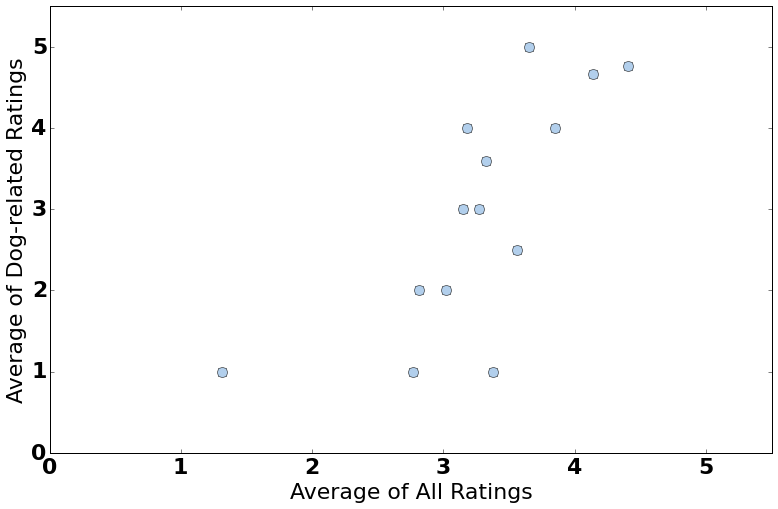

In [95]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.rcParams['figure.figsize'] = 12.94, 8
fig, ax = plt.subplots(1, 1)
ax.plot(average_ratings, average_dog_ratings, 'o', color='#B2CFEC', ms=10)
ax.set_xlabel('Average of All Ratings')
ax.set_ylabel('Average of Dog-related Ratings')
ax.set_xlim([0, 5.5])
ax.set_ylim([0, 5.5])
plt.savefig('/Users/matt/Desktop/rating_comparison.png', dpi=144)

In [70]:
print(len(bf_reviews))
print(len(yelp_phoenix))
print(len(yelp_dog_review))

In [35]:
len(bf_reviews)

8

In [36]:
len(yelp_phoenix)

1120

In [37]:
len(yelp_dog_review)

36

In [38]:
rev_nums = [len(bf_reviews), len(yelp_phoenix), len(yelp_dog_review)]

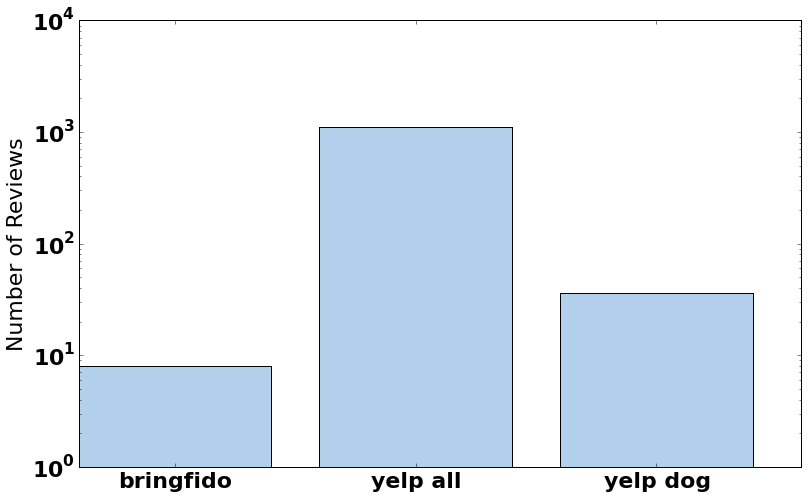

In [94]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
bars = ax1.bar(range(1,4), rev_nums, color='#B2CFEC', edgecolor='black')
ax1.set_yscale('log')
ax1.set_ylabel('Number of Reviews')
names = ['bringfido', 'yelp all', 'yelp dog']
plt.xticks([1.4, 2.4, 3.4], names, rotation=0)
plt.savefig('barcharts.png', dpi=144)